## Clarified calculations for alpha variant paper

In [1]:
#basic data libraries
import makedalytics as ma
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import rc
from datetime import datetime
from datetime import date
from pandas.tseries.offsets import DateOffset
# math libraries and packages
import math as mth
#from scipy import stats
#fancy visualization and other fancy libraries and packages
import datetime as dt
from IPython.display import Markdown, display
from matplotlib import pylab
import pylab as p

In [2]:
#import MOH dataset
moh= pd.read_csv('base_MOH_data/covid19-data-israel-30032021.csv')

In [3]:
moh.head(5)

,תאריך,מספר בדיקות מצטבר,מספר חולים מאושפזים,מספר חולים מונשמים,מספר חולים מצטבר,מספר חולים קשה,מספר נפטרים מצטבר
0,26/01/2020 00:00:00,134,0,0,7,0,0
1,27/01/2020 00:00:00,135,0,0,7,0,0
2,28/01/2020 00:00:00,135,0,0,7,0,0
3,29/01/2020 00:00:00,141,0,0,7,0,0
4,30/01/2020 00:00:00,145,0,0,7,0,0


In [4]:
moh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   תאריך                430 non-null    object
 1   מספר בדיקות מצטבר    430 non-null    object
 2   מספר חולים מאושפזים  430 non-null    object
 3   מספר חולים מונשמים   430 non-null    int64 
 4   מספר חולים מצטבר     430 non-null    object
 5   מספר חולים קשה       430 non-null    object
 6   מספר נפטרים מצטבר    430 non-null    object
dtypes: int64(1), object(6)
memory usage: 23.6+ KB


In [5]:
print(moh.columns)

Index(['תאריך', 'מספר בדיקות מצטבר', 'מספר חולים מאושפזים',
       'מספר חולים מונשמים', 'מספר חולים מצטבר', 'מספר חולים קשה',
       'מספר נפטרים מצטבר'],
      dtype='object')


In [6]:
moh =  moh.rename(columns={'מספר חולים קשה': "number_kashim", 'מספר חולים מונשמים': "total_intubated", 'מספר נפטרים מצטבר':'deaths'})

In [7]:
moh =  moh.rename(columns={'תאריך': "date"})

In [8]:
moh =  moh.rename(columns={'תאריך': "date"})

In [9]:
moh =  moh.rename(columns={'מספר בדיקות מצטבר': "number_tests", 'חולים מאושפזים': "number_admitted",'מספר חולים מצטבר':"number_sick"})

In [10]:

moh['total_deaths_n'] = moh['deaths'].str.replace(',', '')
moh['total_deaths_n'] = pd.to_numeric(moh['total_deaths_n'])

In [11]:
# now we can add a column for daily deaths by subtracting the total deaths from the deaths the day before
moh['daily_deaths']= moh['total_deaths_n']-  moh['total_deaths_n'].shift()

In [12]:
moh ['date_as_date'] = pd.to_datetime(moh.date, format= '%d/%m/%Y %H:%M:%S')

In [13]:
moh['total_sick_n']= moh.number_sick.str.replace(',', '')
moh['total_sick_n'] = pd.to_numeric(moh['total_sick_n'])
moh['case_fatality_rate'] = moh.total_deaths_n/moh.total_sick_n

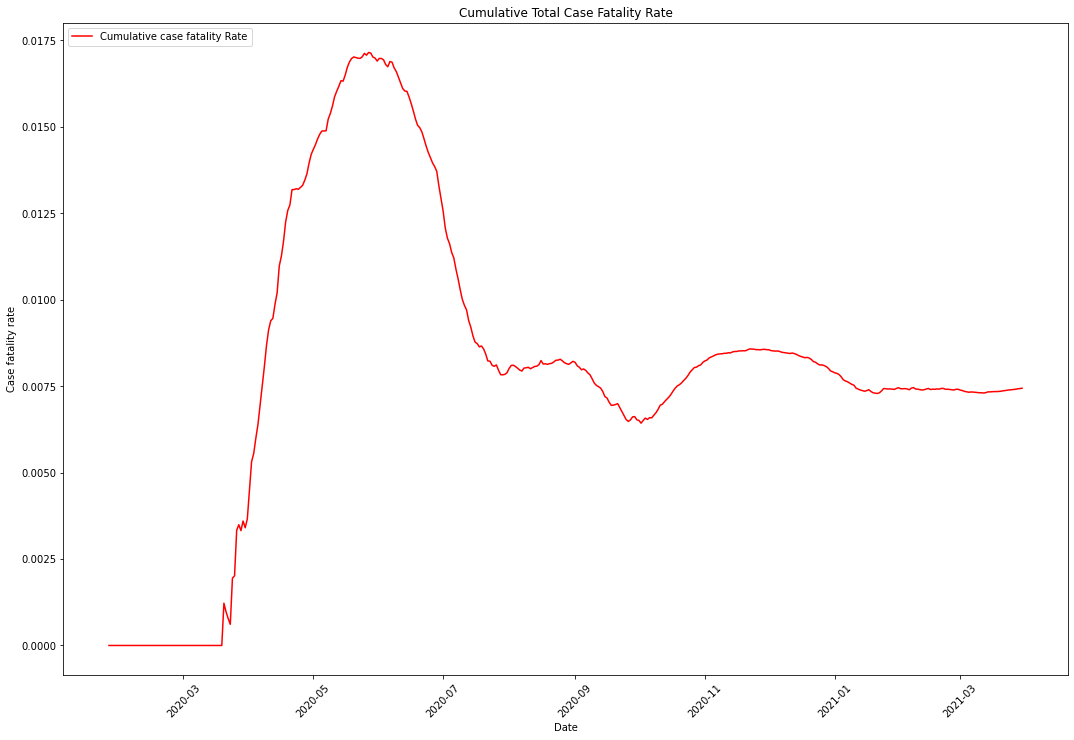

In [14]:
fig, ax = plt.subplots(figsize=(18, 12))

# Add x-axis and y-axis
ax.plot(moh.date_as_date,
       moh['case_fatality_rate'],
       label='Cumulative case fatality Rate',
       color='red')
# add dashboard
# ax.bar(df.date_as_date,
#        df['daily_deaths'],
#        label='Rate',
#       color='yellow')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Case fatality rate",
       title="Cumulative Total Case Fatality Rate")

plt. xticks(rotation=45)
plt.legend(loc='upper left')
# put in lines for lockdowns


In [15]:
## Daily case fatality rate
moh['daily_sick'] = moh['total_sick_n'] - moh['total_sick_n'].shift()
moh['daily_case_fatality_rate'] = moh['daily_deaths']/moh['daily_sick']
moh 

,date,number_tests,מספר חולים מאושפזים,total_intubated,number_sick,number_kashim,deaths,total_deaths_n,daily_deaths,date_as_date,total_sick_n,case_fatality_rate,daily_sick,daily_case_fatality_rate
0,26/01/2020 00:00:00,134,0,0,7,0,0,0,NaN,2020-01-26,7,0.000000,NaN,NaN
1,27/01/2020 00:00:00,135,0,0,7,0,0,0,0.0,2020-01-27,7,0.000000,0.0,NaN
2,28/01/2020 00:00:00,135,0,0,7,0,0,0,0.0,2020-01-28,7,0.000000,0.0,NaN
3,29/01/2020 00:00:00,141,0,0,7,0,0,0,0.0,2020-01-29,7,0.000000,0.0,NaN
4,30/01/2020 00:00:00,145,0,0,7,0,0,0,0.0,2020-01-30,7,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,26/03/2021 00:00:00,"14,828,138",718,207,"831,625",458,"6,158",6158,11.0,2021-03-26,831625,0.007405,520.0,0.021154
426,27/03/2021 00:00:00,"14,844,984",668,205,"831,856",442,"6,164",6164,6.0,2021-03-27,831856,0.007410,231.0,0.025974
427,28/03/2021 00:00:00,"14,856,471",680,210,"831,985",452,"6,176",6176,12.0,2021-03-28,831985,0.007423,129.0,0.093023
428,29/03/2021 00:00:00,"14,898,839",713,202,"832,348",441,"6,185",6185,9.0,2021-03-29,832348,0.007431,363.0,0.024793


In [16]:
moh = moh[['date', 'number_sick', 'daily_sick','case_fatality_rate', 'total_sick_n', 'daily_deaths', 'total_deaths_n' ]]

In [17]:
moh

,date,number_sick,daily_sick,case_fatality_rate,total_sick_n,daily_deaths,total_deaths_n
0,26/01/2020 00:00:00,7,NaN,0.000000,7,NaN,0
1,27/01/2020 00:00:00,7,0.0,0.000000,7,0.0,0
2,28/01/2020 00:00:00,7,0.0,0.000000,7,0.0,0
3,29/01/2020 00:00:00,7,0.0,0.000000,7,0.0,0
4,30/01/2020 00:00:00,7,0.0,0.000000,7,0.0,0
...,...,...,...,...,...,...,...
425,26/03/2021 00:00:00,"831,625",520.0,0.007405,831625,11.0,6158
426,27/03/2021 00:00:00,"831,856",231.0,0.007410,831856,6.0,6164
427,28/03/2021 00:00:00,"831,985",129.0,0.007423,831985,12.0,6176
428,29/03/2021 00:00:00,"832,348",363.0,0.007431,832348,9.0,6185


In [18]:
df = pd.read_csv('D:/MAXCORlabwork/covid/current_moh_file/covid19-data-israel-30032021.csv', index_col=0)
lo = df.rename(columns={'מספר חולים קשה': "number_kashim", 'מספר חולים מונשמים': "total_intubated", 'מספר נפטרים מצטבר':'deaths',
                       }                )
lo =  lo.rename(columns={'מספר בדיקות מצטבר': "number_tests", 'חולים מאושפזים': "number_admitted",'מספר חולים מצטבר':"number_sick"})
#monthly_moh = df.resample('M').sum()
#monthly_moh
lo.index = pd.to_datetime(lo.index, format = '%d/%m/%Y %H:%M:%S' )

lo.number_sick = lo.number_sick.str.replace(',', '')
lo.number_sick= pd.to_numeric(lo.number_sick)
lo.deaths = lo.deaths.str.replace(',', '')
lo.deaths= pd.to_numeric(lo.deaths)
lo['daily_deaths'] = lo['deaths'] -lo['deaths'].shift()
lo['daily_sick']= lo['number_sick'] - lo['number_sick'].shift()
monthly_moh = lo.resample('M').sum()

monthly_moh= monthly_moh.rename(columns={'daily_deaths':'monthly_deaths', 'daily_sick': 'monthly_sick'} )
#print(type(lo.number_sick[6]))
monthly_moh['monthly_case_fatality']= monthly_moh['monthly_deaths']/monthly_moh['monthly_sick']

In [19]:
monthly_moh

,total_intubated,number_sick,deaths,monthly_deaths,monthly_sick,monthly_case_fatality
תאריך,,,,,,
2020-01-31,0,42,0,0.0,0.0,NaN
2020-02-29,0,227,0,0.0,6.0,0.000000
2020-03-31,482,37774,102,21.0,5719.0,0.003672
2020-04-30,3380,367801,4090,205.0,10181.0,0.020136
2020-05-31,1617,512586,8297,63.0,1184.0,0.053209
2020-06-30,764,603096,9257,40.0,8363.0,0.004783
2020-07-31,1917,1461204,13156,237.0,46295.0,0.005119
2020-08-31,3344,2917351,23710,395.0,45176.0,0.008744
2020-09-30,4371,5222395,37300,654.0,130514.0,0.005011


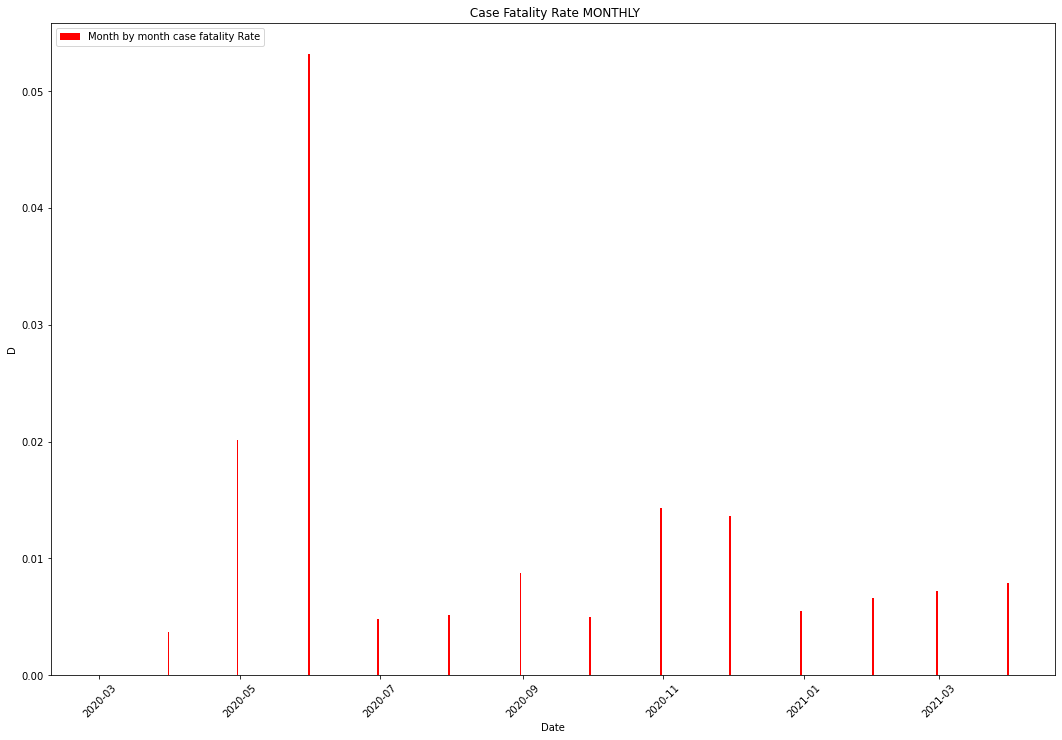

In [20]:
fig, ax = plt.subplots(figsize=(18, 12))

# Add x-axis and y-axis
ax.bar(monthly_moh.index,
       monthly_moh['monthly_case_fatality'],
       label='Month by month case fatality Rate',
       color='red')
# add dashboard
# ax.bar(df.date_as_date,
#        df['daily_deaths'],
#        label='Rate',
#       color='yellow')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="D",
       title=" Case Fatality Rate MONTHLY")

plt. xticks(rotation=45)
plt.legend(loc='upper left')

In [21]:
weekly_moh = lo.resample('W').sum()

weekly_moh= weekly_moh.rename(columns={'daily_deaths':'weekly_deaths', 'daily_sick': 'weekly_sick'} )
#print(type(lo.number_sick[6]))
weekly_moh['weekly_case_fatality']= weekly_moh['weekly_deaths']/weekly_moh['weekly_sick']

In [22]:
weekly_moh

,total_intubated,number_sick,deaths,weekly_deaths,weekly_sick,weekly_case_fatality
תאריך,,,,,,
2020-01-26,0,7,0,0.0,0.0,NaN
2020-02-02,0,49,0,0.0,0.0,NaN
2020-02-09,0,49,0,0.0,0.0,NaN
2020-02-16,0,49,0,0.0,0.0,NaN
2020-02-23,0,52,0,0.0,1.0,0.000000
...,...,...,...,...,...,...
2021-03-07,1535,5555742,40815,125.0,25504.0,0.004901
2021-03-14,1461,5698522,41683,128.0,16870.0,0.007587
2021-03-21,1451,5778345,42452,88.0,8567.0,0.010272


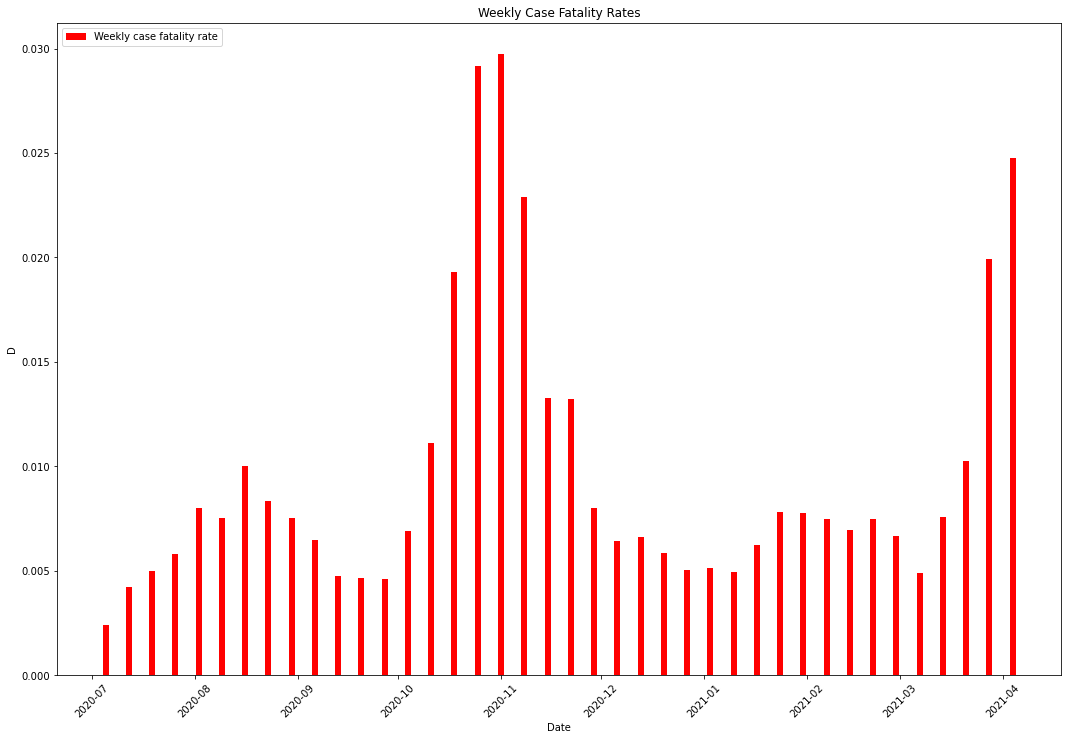

In [23]:
fig, ax = plt.subplots(figsize=(18, 12))

# Add x-axis and y-axis
ax.bar(weekly_moh.index[weekly_moh.index > dt.datetime(2020, 7, 1)],
       weekly_moh.weekly_case_fatality[weekly_moh.index > dt.datetime(2020, 7, 1)],
       label='Weekly case fatality rate',
       color='red',
       width=1.8,)
# add dashboard
# ax.bar(df.date_as_date,
#        df['daily_deaths'],
#        label='Rate',
#       color='yellow')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="D",
       title="Weekly Case Fatality Rates")

plt. xticks(rotation=45)
plt.legend(loc='upper left')

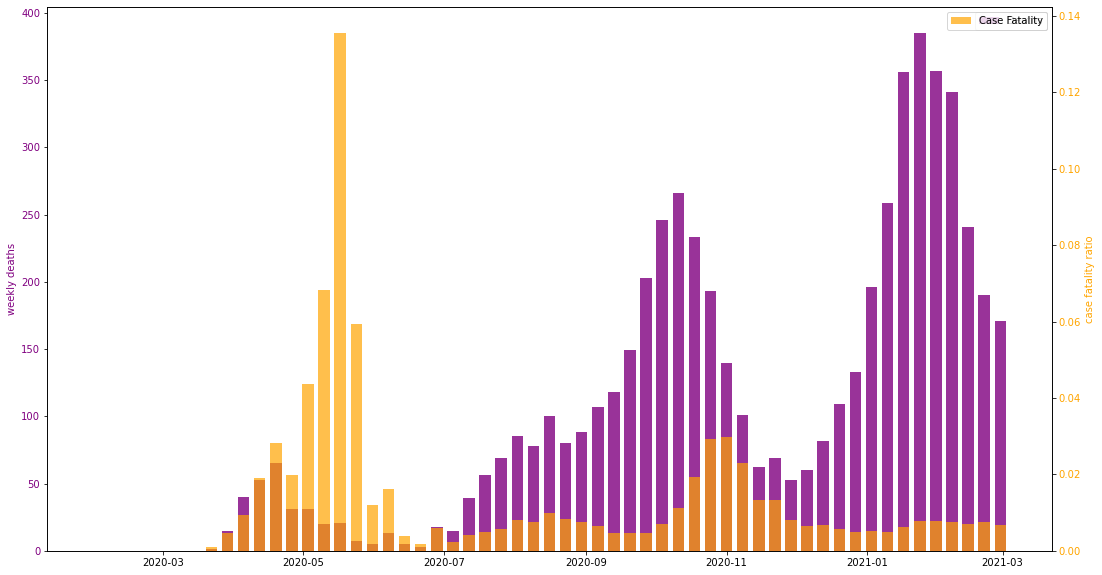

In [24]:
w = 5
# and obviously you can add the weekly deaths as I did before
weekly_moh_cut = weekly_moh[1:58].copy(deep = True)
#weekly_moh_cut
x = weekly_moh_cut.index
y1 = weekly_moh_cut['weekly_deaths']
y2 = weekly_moh_cut['weekly_case_fatality']

fig = plt.figure(num=None, figsize=(18, 10))
#??figsize= (18,12)
ax1 = fig.add_subplot(111)
ax1.bar(x, y1,  color='purple',alpha = 0.8,  width = w, align='center', label='Deaths')
ax1.set_ylabel('weekly deaths',color='purple')
#ax1.set_ylim(1)
# ax1.set_ylim([0,1])
for tl in ax1.get_yticklabels():
    tl.set_color('purple')
plt.legend()#loc='upper left')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='orange',alpha = 0.7, width = w, align='center', label='Case Fatality')
ax2.set_ylabel('case fatality ratio', color = 'orange' )
#ax2.set_ylim([0,1])
for tl in ax2.get_yticklabels():
    tl.set_color('orange')
plt.legend()    
plt.rcParams['font.size'] = 24    
plt. xticks(rotation=45)
#plt.legend(loc='upper left')
plt.show()   